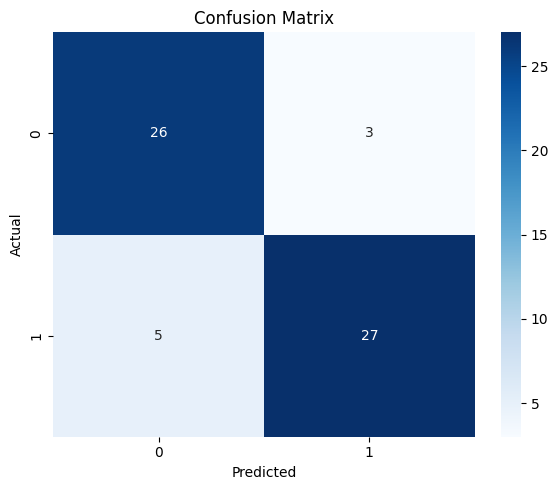

Accuracy : 0.87
Precision: 0.90
Recall   : 0.84
F1 Score : 0.87


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score
)

# === Step 1: Load and Clean the Dataset ===
# If the CSV has corrupted columns due to PDF conversion, fix it here
def load_and_fix_csv(path):
    raw_df = pd.read_csv(path)
    fixed_rows = []

    for i in range(len(raw_df)):
        row = [str(val) for val in raw_df.iloc[i] if pd.notna(val)]
        merged = ' '.join(row).split()
        if len(merged) == 14:
            fixed_rows.append(merged)

    columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
               'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

    df = pd.DataFrame(fixed_rows, columns=columns)
    return df.apply(pd.to_numeric)

# Replace this with your path
df = load_and_fix_csv("heart_rate.csv")

# === Step 2: Prepare Features and Target ===
X = df.drop("target", axis=1)
y = df["target"]

# === Step 3: Split and Train ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# === Step 4: Confusion Matrix Heatmap ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# === Step 5: Evaluation Metrics ===
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")
